In [1]:
import transbigdata as tbd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

D:\II\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\II\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("D:/Code/SmartCity/taxi/2018-10-1.csv", header=0)
data.columns = ['VehicleNum', 'Time', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data.head()                 

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed
0,22227,00:00:03,114.112152,22.600616,1,3
1,22227,00:00:42,114.116470,22.600384,1,42
2,22227,00:01:03,114.117035,22.600483,1,9
3,22227,00:01:23,114.117035,22.600483,1,0
4,22227,00:01:42,114.117668,22.599934,1,5


In [3]:
sz = gpd.read_file(r'D:/Code/SmartCity/geo_data/sz.json')
sz.crs = None
sz.head()

,centroid_x,centroid_y,qh,geometry
0,114.143157,22.577605,罗湖,"POLYGON ((114.10006 22.53431, 114.10083 22.534..."
1,114.041535,22.546180,福田,"POLYGON ((113.98578 22.51348, 114.00553 22.513..."
2,114.270206,22.596432,盐田,"POLYGON ((114.19799 22.55673, 114.19817 22.556..."
3,113.851387,22.679120,宝安,"MULTIPOLYGON (((113.81831 22.54676, 113.81948 ..."
4,113.926290,22.766157,光明,"POLYGON ((113.99768 22.76643, 113.99704 22.766..."


<AxesSubplot: >

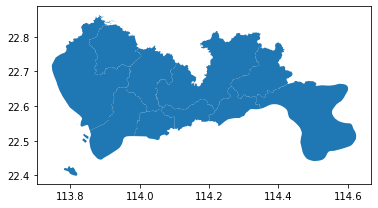

In [4]:
sz.plot()

In [5]:
# Data Preprocessing
# Delete the data outside of the study area
data = tbd.clean_outofshape(data, sz, col=['Lng', 'Lat'], accuracy=500)  #剔除超出研究区域的数据
data.head(20)

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed
0,22227,00:00:03,114.112152,22.600616,1,3
1,22227,00:00:42,114.116470,22.600384,1,42
2,22227,00:01:03,114.117035,22.600483,1,9
3,22227,00:01:23,114.117035,22.600483,1,0
4,22227,00:01:42,114.117668,22.599934,1,5
5,22227,00:02:03,114.119019,22.598083,1,40
6,22227,00:02:23,114.119598,22.596849,1,26
7,22227,00:02:42,114.119598,22.596849,1,0
8,22227,00:03:03,114.119598,22.596849,1,0
9,22227,00:03:23,114.118736,22.596550,1,11


In [6]:
# Delete the data with instantaneous changes in passenger status
data = tbd.clean_taxi_status(data, col=['VehicleNum', 'Time', 'OpenStatus'])
#删除出租车数据中载客状态瞬间变化的记录，这些记录的存在会影响出行订单判断。
#判断条件为:如果对同一辆车，上一条记录与下一条记录的载客状态都与本条记录不同，则本条记录应该删去
#实际上就是按照编号和时间顺序将数据排好
data.head(30)

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed
0,22227,00:00:03,114.112152,22.600616,1,3
1,22227,00:00:42,114.116470,22.600384,1,42
2,22227,00:01:03,114.117035,22.600483,1,9
3,22227,00:01:23,114.117035,22.600483,1,0
4,22227,00:01:42,114.117668,22.599934,1,5
5,22227,00:02:03,114.119019,22.598083,1,40
6,22227,00:02:23,114.119598,22.596849,1,26
7,22227,00:02:42,114.119598,22.596849,1,0
8,22227,00:03:03,114.119598,22.596849,1,0
9,22227,00:03:23,114.118736,22.596550,1,11


In [7]:
# Data gridding
# Define the bounds and generate gridding parameters
bounds = [113.6, 22.4, 114.8, 22.9]
params = tbd.area_to_params(bounds, accuracy=500)
params
#(113.6, 22.4, 0.004872390756896538, 0.004496605206422906)
#栅格参数(lonStart,latStart,deltaLon,deltaLat)，分别为栅格左下角坐标与单个栅格的经纬度长宽
# Mapping GPS data to grids
data['LONCOL'], data['LATCOL'] = tbd.GPS_to_grid(data['Lng'], data['Lat'], params)
data.head()

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed,LONCOL,LATCOL
0,22227,00:00:03,114.112152,22.600616,1,3,105,45
1,22227,00:00:42,114.116470,22.600384,1,42,106,45
2,22227,00:01:03,114.117035,22.600483,1,9,106,45
3,22227,00:01:23,114.117035,22.600483,1,0,106,45
4,22227,00:01:42,114.117668,22.599934,1,5,106,44


In [8]:
# Aggregate data into grids
#python中groupby函数主要的作用是进行数据的分组以及分组后地组内运算！
datatest = data.groupby(['LONCOL', 'LATCOL'])['VehicleNum'].count().reset_index()
# Generate the geometry for grids
datatest['geometry'] = tbd.grid_to_polygon([datatest['LONCOL'], datatest['LATCOL']], params)
 
# Change it into GeoDataFrame
# import geopandas as gpd
datatest = gpd.GeoDataFrame(datatest)
datatest.head()
#计算出每个栅格里的出租车数量（不按时间，是一天数据中所有的点）

,LONCOL,LATCOL,VehicleNum,geometry
0,32,75,4,"POLYGON ((113.75348 22.73500, 113.75835 22.735..."
1,32,76,1,"POLYGON ((113.75348 22.73949, 113.75835 22.739..."
2,33,68,16,"POLYGON ((113.75835 22.70352, 113.76323 22.703..."
3,33,69,9,"POLYGON ((113.75835 22.70802, 113.76323 22.708..."
4,33,70,10,"POLYGON ((113.75835 22.71251, 113.76323 22.712..."


In [9]:
# Extract taxi OD from GPS data
#OD形成就是每一个订单都算一个OD行程，每一行代表一个OD行程
#stime代表出发时间，slon和slat是出发的经纬度
#etime代表结束时间，elon和elat是结束的经纬度
#   ID是订单顺序号
oddata = tbd.taxigps_to_od(data,col = ['VehicleNum', 'Time', 'Lng', 'Lat', 'OpenStatus'])
oddata

,VehicleNum,stime,slon,slat,etime,elon,elat,ID
44,22227,00:29:54,114.056915,22.636801,01:40:35,114.057381,22.642517,0
81,22227,01:48:54,114.063820,22.639532,02:17:26,114.103531,22.617718,1
118,22227,02:23:27,114.111420,22.607849,02:29:55,114.106232,22.602833,2
141,22227,02:40:24,114.110580,22.609083,03:01:13,114.121117,22.610050,3
178,22227,03:10:58,114.119049,22.613750,03:13:59,114.129021,22.617750,4
...,...,...,...,...,...,...,...,...
958201,36837,21:55:34,114.035530,22.542334,22:25:59,114.129570,22.547899,9842
958374,36837,22:26:20,114.129547,22.548117,22:36:26,114.125801,22.545250,9843
958416,36837,22:42:56,114.120186,22.541817,22:57:03,114.072037,22.536516,9844
958511,36837,22:59:45,114.063782,22.531866,23:13:17,114.081314,22.562050,9845


In [10]:
data_deliver, data_idle = tbd.taxigps_traj_point(data,oddata,col=['VehicleNum',
                                                                  'Time',
                                                                  'Lng',
                                                                  'Lat',
                                                                  'OpenStatus'])

In [11]:
data_deliver #载客状态的od路径

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed,LONCOL,LATCOL,ID,flag
44,22227,00:29:54,114.056915,22.636801,1,13.0,94.0,53.0,0.0,1.0
45,22227,00:30:14,114.055885,22.636133,1,22.0,94.0,53.0,0.0,1.0
46,22227,00:30:34,114.055450,22.635700,1,6.0,93.0,52.0,0.0,1.0
47,22227,00:30:54,114.055634,22.633883,1,35.0,94.0,52.0,0.0,1.0
48,22227,00:31:14,114.055733,22.633617,1,6.0,94.0,52.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
958655,36837,23:27:53,113.978981,22.558001,1,22.0,78.0,35.0,9846.0,1.0
958656,36837,23:28:03,113.978897,22.558666,1,39.0,78.0,35.0,9846.0,1.0
958657,36837,23:28:13,113.978783,22.559517,1,16.0,78.0,35.0,9846.0,1.0
958658,36837,23:28:23,113.978767,22.559668,1,0.0,78.0,36.0,9846.0,1.0


In [22]:
df = pd.DataFrame(data_deliver)

# 为time列增加统一前缀并转为datetime类型
df["Time"] = pd.to_datetime("2018-10-1 " + df["Time"])
df

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed,LONCOL,LATCOL,ID,flag
44,22227,2018-10-01 00:29:54,114.056915,22.636801,1,13.0,94.0,53.0,0.0,1.0
45,22227,2018-10-01 00:30:14,114.055885,22.636133,1,22.0,94.0,53.0,0.0,1.0
46,22227,2018-10-01 00:30:34,114.055450,22.635700,1,6.0,93.0,52.0,0.0,1.0
47,22227,2018-10-01 00:30:54,114.055634,22.633883,1,35.0,94.0,52.0,0.0,1.0
48,22227,2018-10-01 00:31:14,114.055733,22.633617,1,6.0,94.0,52.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
958655,36837,2018-10-01 23:27:53,113.978981,22.558001,1,22.0,78.0,35.0,9846.0,1.0
958656,36837,2018-10-01 23:28:03,113.978897,22.558666,1,39.0,78.0,35.0,9846.0,1.0
958657,36837,2018-10-01 23:28:13,113.978783,22.559517,1,16.0,78.0,35.0,9846.0,1.0
958658,36837,2018-10-01 23:28:23,113.978767,22.559668,1,0.0,78.0,36.0,9846.0,1.0


In [12]:
data_idle #空载状态的od路径

,VehicleNum,Time,Lng,Lat,OpenStatus,Speed,LONCOL,LATCOL,ID,flag
79,22227,01:40:35,114.057381,22.642517,0,0.0,94.0,54.0,0.0,0.0
80,22227,01:40:36,114.057381,22.642517,0,0.0,94.0,54.0,0.0,0.0
116,22227,02:17:26,114.103531,22.617718,0,9.0,103.0,48.0,1.0,0.0
117,22227,02:17:27,114.103531,22.617718,0,9.0,103.0,48.0,1.0,0.0
138,22227,02:29:55,114.106232,22.602833,0,0.0,104.0,45.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
962396,36933,23:51:35,114.035698,22.646999,0,0.0,89.0,55.0,9846.0,0.0
962397,36933,23:52:05,114.035698,22.646999,0,0.0,89.0,55.0,9846.0,0.0
962398,36933,23:52:43,114.036499,22.648300,0,23.0,90.0,55.0,9846.0,0.0
962399,36933,23:53:13,114.037300,22.649799,0,0.0,90.0,56.0,9846.0,0.0


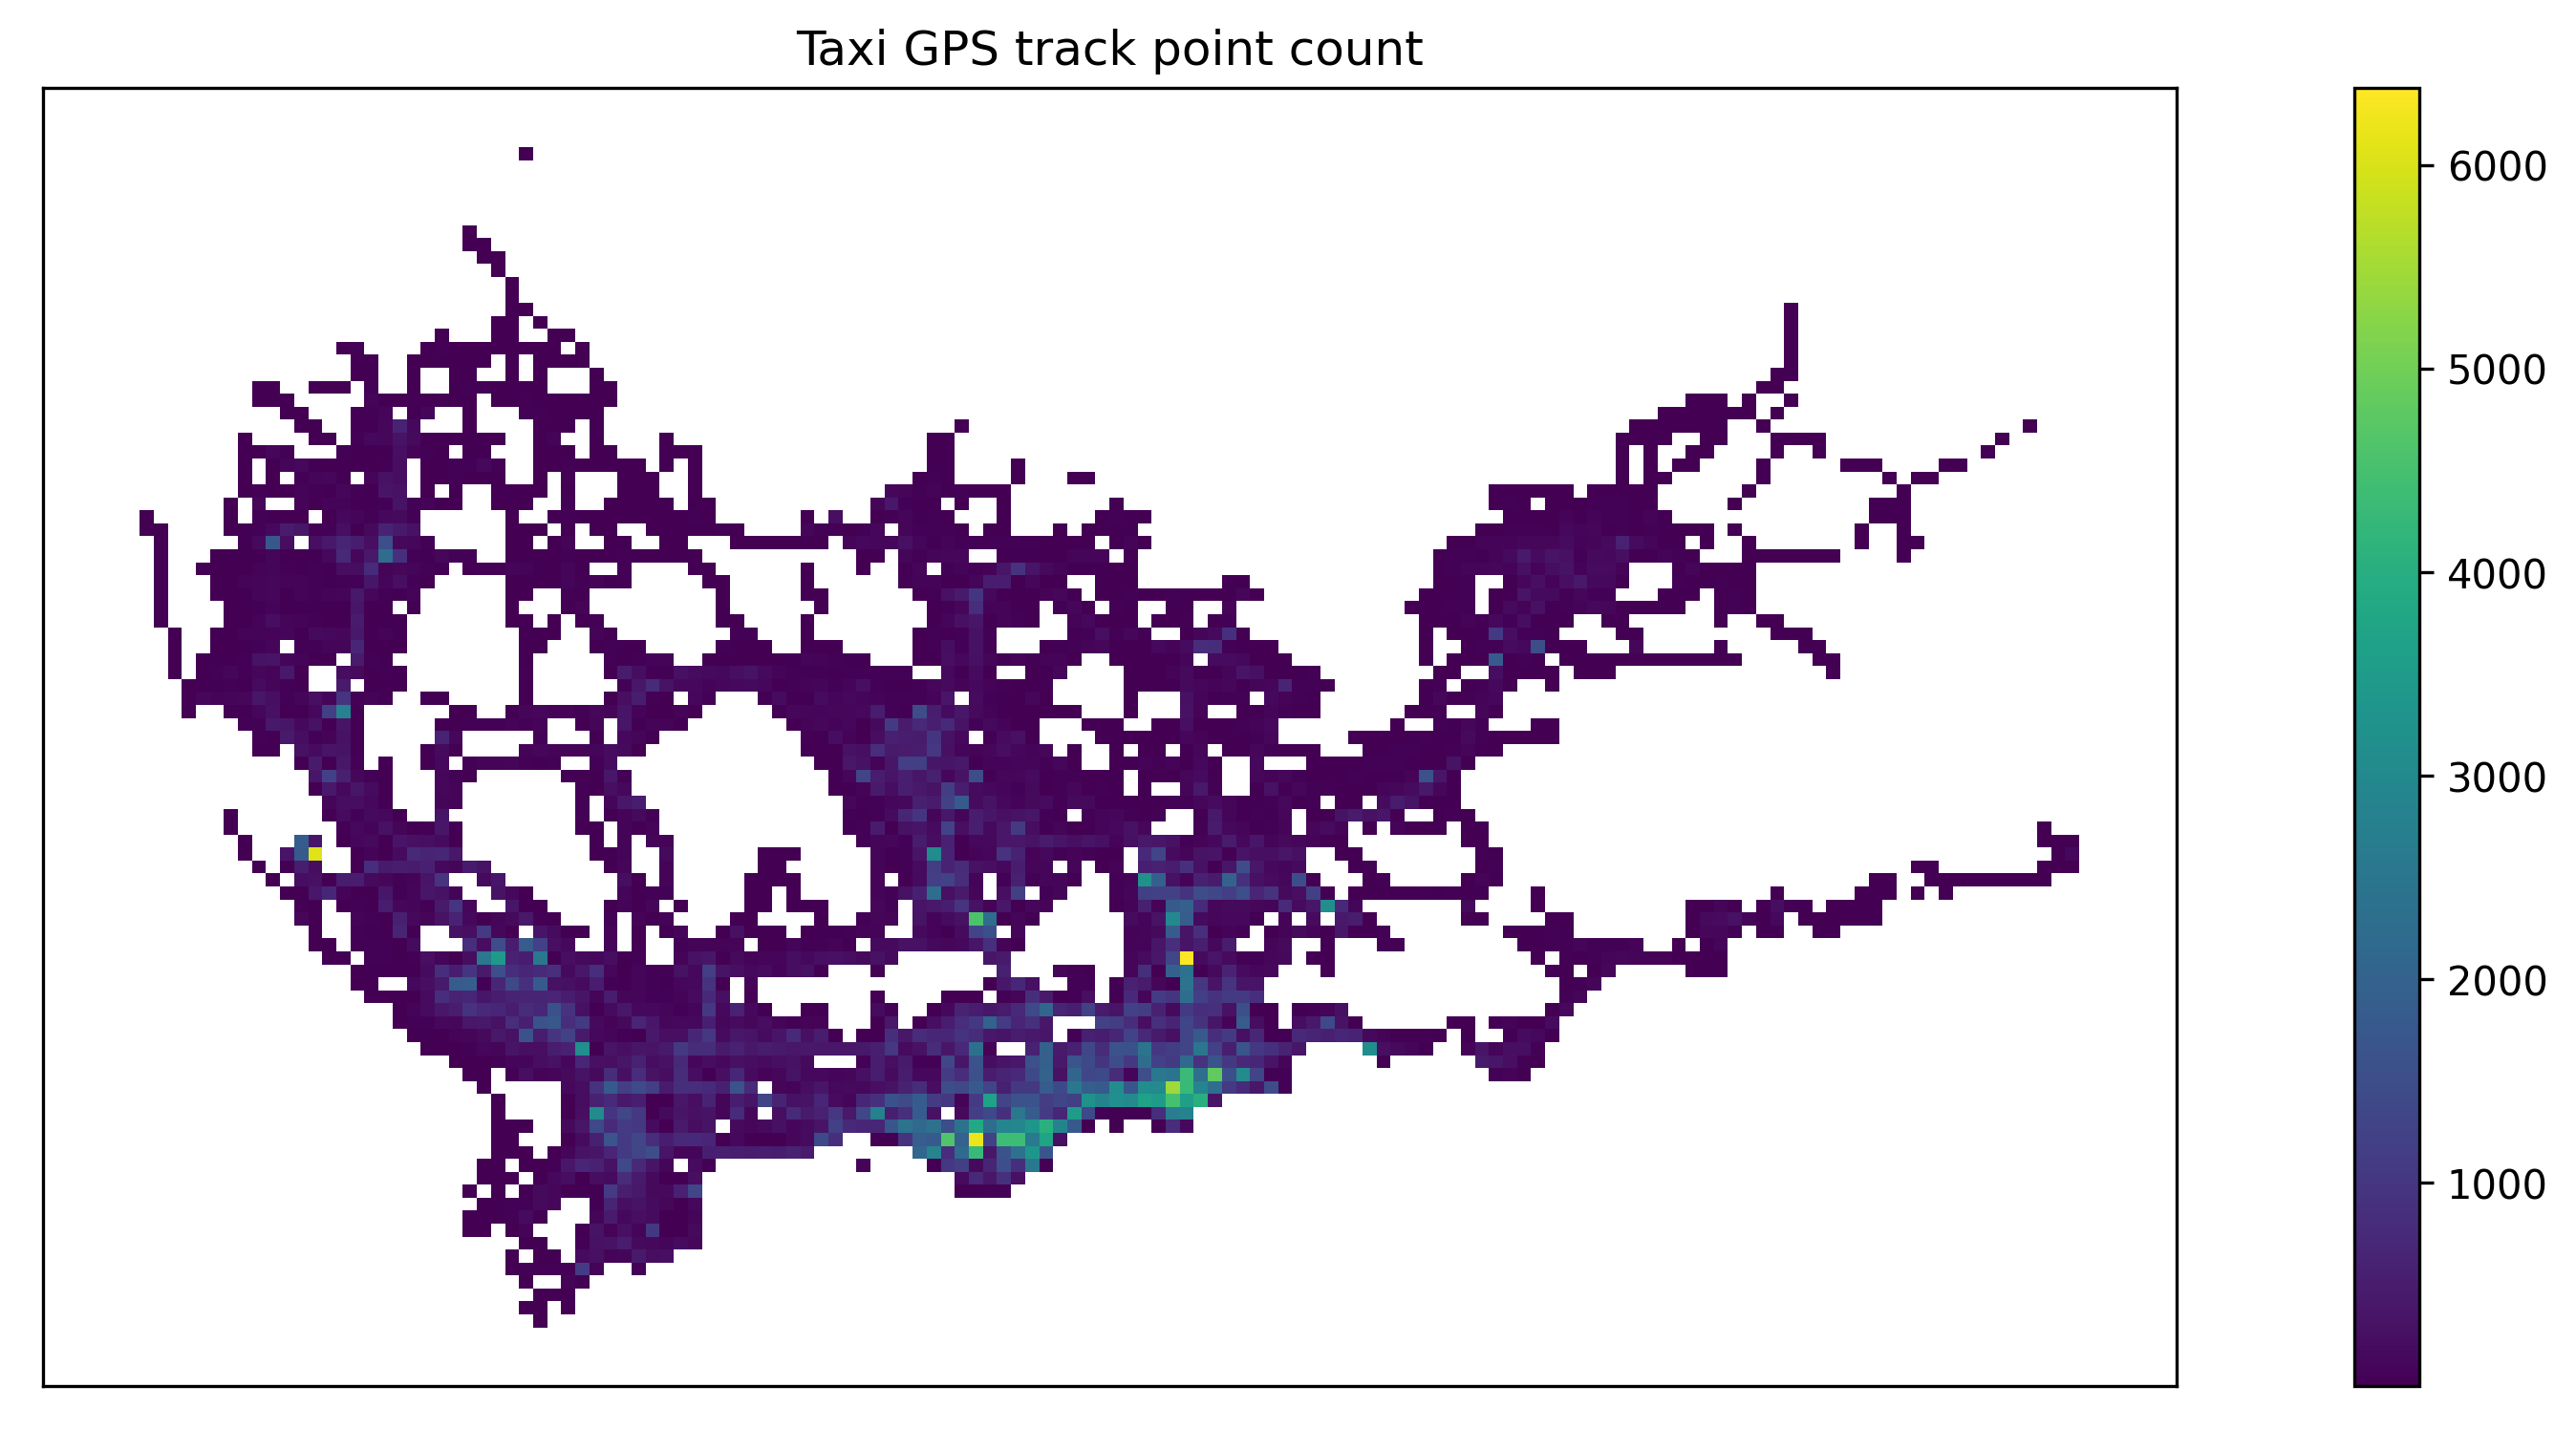

In [13]:
# Plot the grids
fig = plt.figure(1, (16, 6), dpi=300)
ax1 = plt.subplot(111)
#ax用于调整大小 
# tbd.plot_map(plt, bounds, zoom=10, style=4)
datatest.plot(ax=ax1, column='VehicleNum', legend=True)
plt.xticks([], fontsize=10)
plt.yticks([], fontsize=10)
plt.title('Taxi GPS track point count', fontsize=12);

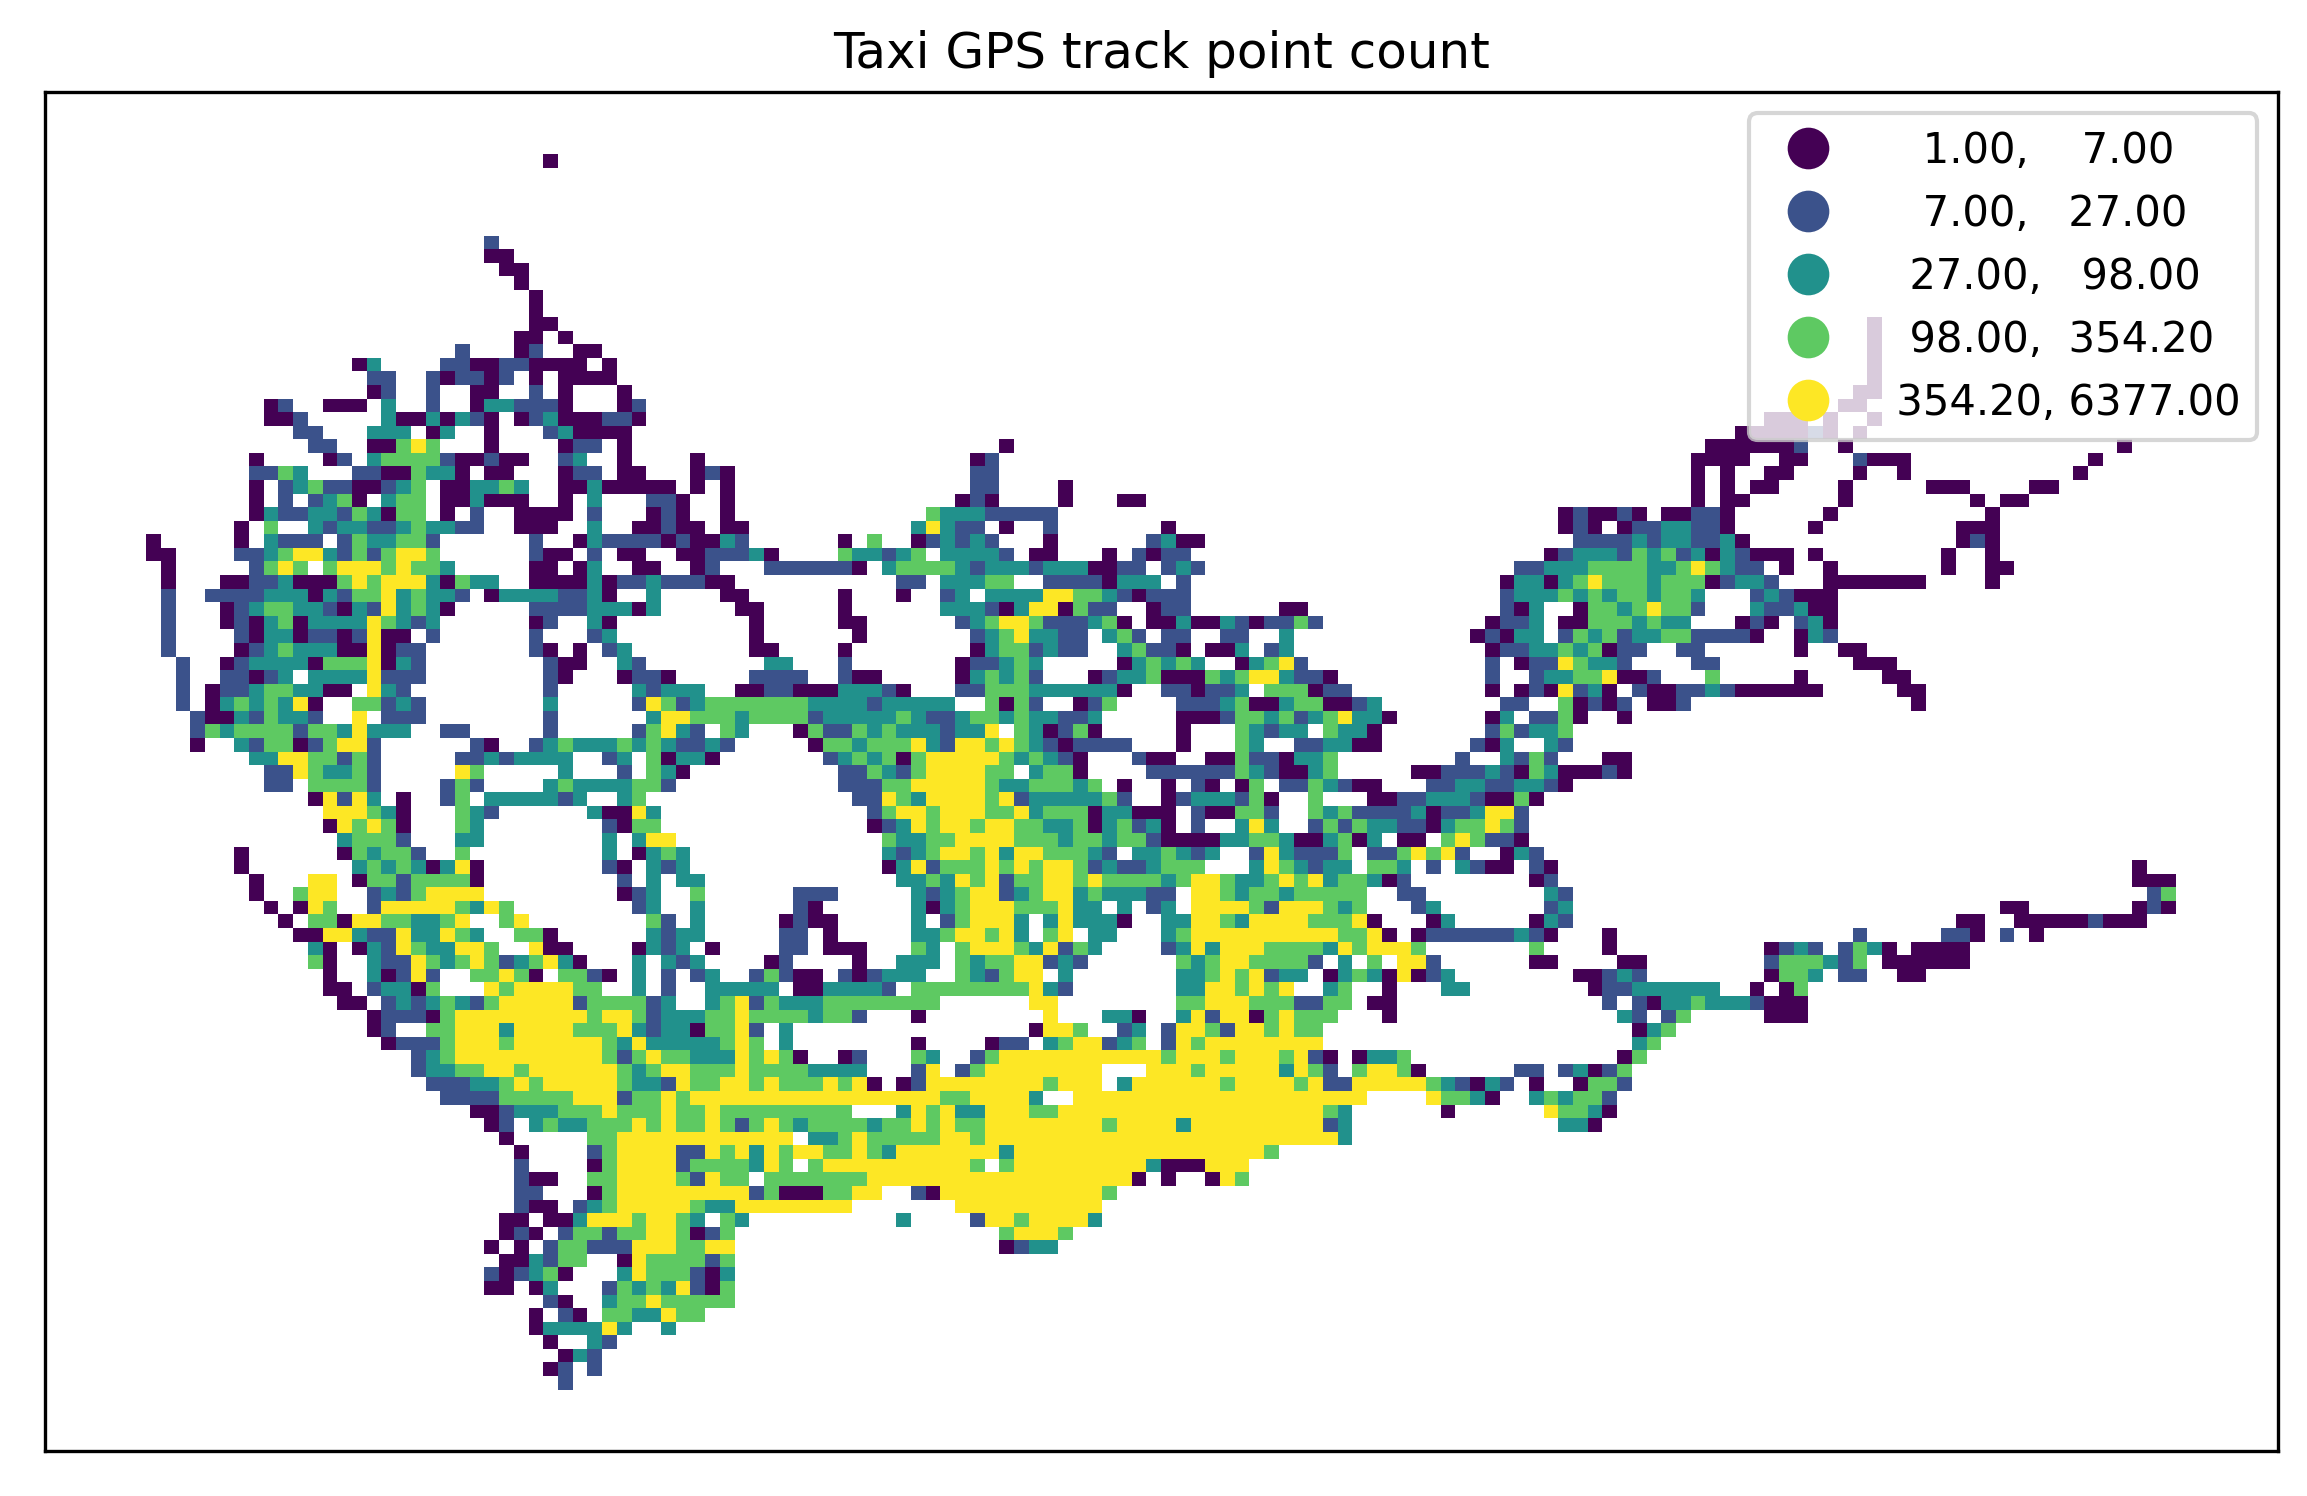

In [14]:
# Plot the grids
fig = plt.figure(1, (16, 6), dpi=300) # 确定图形高为6，宽为8；图形清晰度
ax1 = plt.subplot(111)
datatest.plot(ax=ax1, column='VehicleNum', legend=True, scheme='quantiles')
# plt.legend(fontsize=10)
plt.xticks([], fontsize=10)
plt.yticks([], fontsize=10)
plt.title('Taxi GPS track point count', fontsize=12);

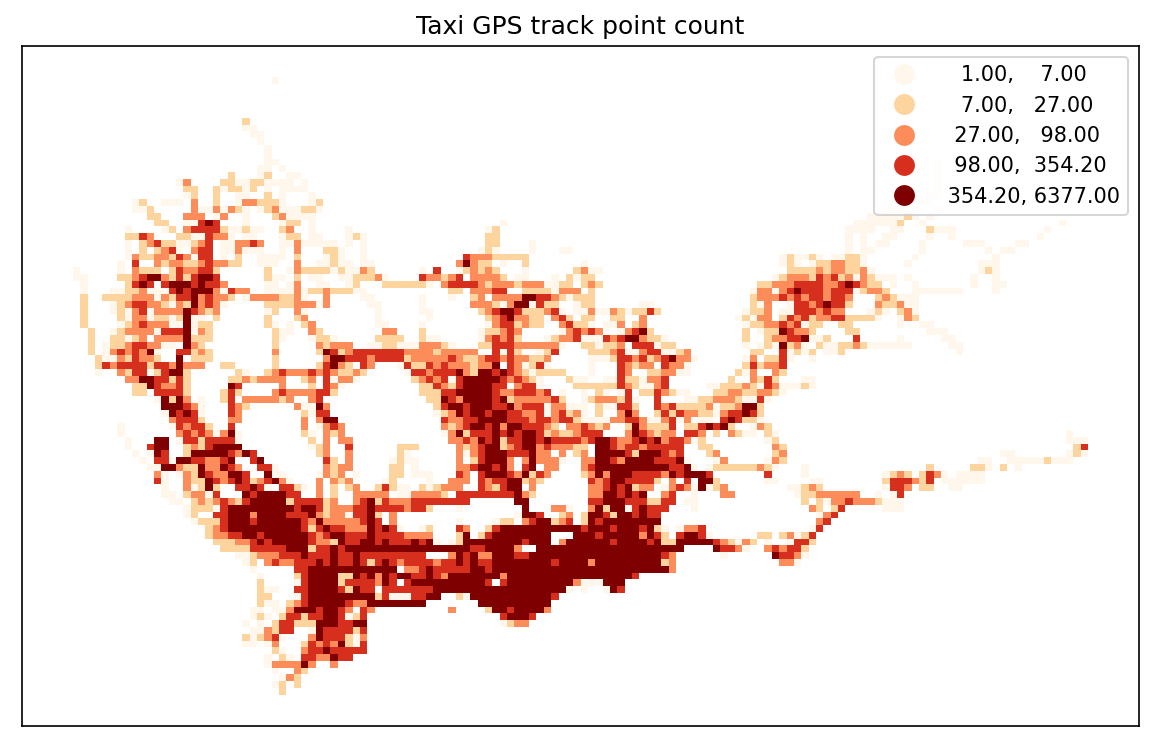

In [15]:
# Plot the grids
fig = plt.figure(1, (16, 6), dpi=150) # 确定图形高为6，宽为8；图形清晰度
ax1 = plt.subplot(111)
datatest.plot(ax=ax1, column='VehicleNum', legend=True, cmap='OrRd', scheme='quantiles')
# plt.legend(fontsize=10)
plt.xticks([], fontsize=10)
plt.yticks([], fontsize=10)
plt.title('Taxi GPS track point count', fontsize=12);

D:\II\Anaconda\lib\site-packages\transbigdata\traj.py:790: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  traj['geometry'] = geometry


<AxesSubplot: >

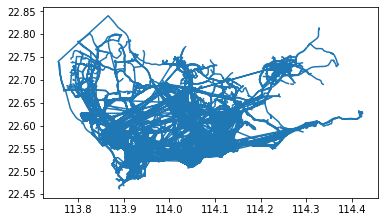

In [16]:
traj_deliver = tbd.traj_to_linestring(data_deliver)
traj_deliver.plot()

D:\II\Anaconda\lib\site-packages\transbigdata\traj.py:790: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  traj['geometry'] = geometry


<AxesSubplot: >

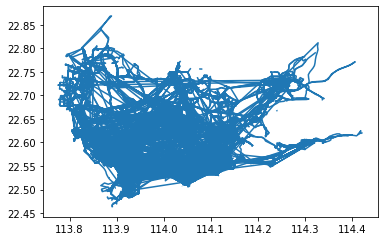

In [17]:
traj_idle = tbd.traj_to_linestring(data_idle)
traj_idle.plot()

In [18]:
# 可视化数据点分布
map1 = tbd.visualization_data(data,col = ['Lng','Lat'],accuracy=40,height = 500) #accuracy是栅格大小，数值越大表示一个栅格涵盖地图面积越大
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [19]:
# 可视化数据点分布
map2 = tbd.visualization_od(oddata,accuracy=2000,height = 500)
map2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'd3s4dcp', 'type': …

In [23]:
map3 = tbd.visualization_trip(df)  #一天当中的所有载客轨迹
map3

Processing trajectory data...
Generate visualization...
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'hizm36i', 'type': …

In [28]:
combined_data = pd.read_csv("C:/Users/ISee/JupyterCode/SmartCity/project/taxi/combined_data.csv", header=0)
combined_data.columns = ['VehicleNum', 'Time', 'Lng', 'Lat', 'OpenStatus', 'Speed']
combined_data = tbd.clean_outofshape(combined_data, sz, col=['Lng', 'Lat'], accuracy=500)  #剔除超出研究区域的数据
combined_data = tbd.clean_taxi_status(combined_data, col=['VehicleNum', 'Time', 'OpenStatus'])
combined_data['LONCOL'], combined_data['LATCOL'] = tbd.GPS_to_grid(combined_data['Lng'], combined_data['Lat'], params)
combined_oddata = tbd.taxigps_to_od(combined_data,col = ['VehicleNum', 'Time', 'Lng', 'Lat', 'OpenStatus'])
combined_data_deliver, combined_data_idle = tbd.taxigps_traj_point(combined_data,combined_oddata,col=['VehicleNum',
                                                                  'Time',
                                                                  'Lng',
                                                                  'Lat',
                                                                  'OpenStatus'])
map4 = tbd.visualization_trip(combined_data_deliver)  #一天当中的所有载客轨迹
map4

Processing trajectory data...
Generate visualization...
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'hizm36i', 'type': …